In [1]:
# Dependencies and Setup
# !pip install citipy
#!pip install gmaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import os
import time
from scipy.stats import linregress
import gmaps
import gmaps.datasets
# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

df = pd.DataFrame(cities)
df['Country'] = ''
df['Date'] = ''
df['Lat'] = ''
df['Lng'] = ''
df['Max Temp'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Wind Speed'] = ''
df.rename(columns = {0 : 'City'}, inplace = True)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    response = requests.get(url + 'appid=' + weather_api_key + '&q=' + city + "&units=Imperial")
    response = response.json()
    try:
        print(f'{city} has been added to the DataFrame.')
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
    except(KeyError, IndexError):
        print('Missing City ... Skipping')

lewisville has been added to the DataFrame.
taolanaro has been added to the DataFrame.
Missing City ... Skipping
pinega has been added to the DataFrame.
san cristobal has been added to the DataFrame.
huacho has been added to the DataFrame.
busselton has been added to the DataFrame.
cortez has been added to the DataFrame.
kushima has been added to the DataFrame.
ambon has been added to the DataFrame.
illoqqortoormiut has been added to the DataFrame.
Missing City ... Skipping
sibolga has been added to the DataFrame.
bluff has been added to the DataFrame.
barrow has been added to the DataFrame.
qaanaaq has been added to the DataFrame.
hamilton has been added to the DataFrame.
mayumba has been added to the DataFrame.
bengkulu has been added to the DataFrame.
albany has been added to the DataFrame.
manzanillo has been added to the DataFrame.
prabumulih has been added to the DataFrame.
ushuaia has been added to the DataFrame.
east london has been added to the DataFrame.
punta arenas has been

maroantsetra has been added to the DataFrame.
palabuhanratu has been added to the DataFrame.
Missing City ... Skipping
atasu has been added to the DataFrame.
carroll has been added to the DataFrame.
barrhead has been added to the DataFrame.
beloha has been added to the DataFrame.
ngukurr has been added to the DataFrame.
Missing City ... Skipping
ayorou has been added to the DataFrame.
constitucion has been added to the DataFrame.
bonavista has been added to the DataFrame.
alta floresta has been added to the DataFrame.
pochutla has been added to the DataFrame.
zaysan has been added to the DataFrame.
kota kinabalu has been added to the DataFrame.
valreas has been added to the DataFrame.
correntina has been added to the DataFrame.
ahipara has been added to the DataFrame.
buritis has been added to the DataFrame.
adrar has been added to the DataFrame.
batagay-alyta has been added to the DataFrame.
geraldton has been added to the DataFrame.
kaitangata has been added to the DataFrame.
krasnos

vaitupu has been added to the DataFrame.
Missing City ... Skipping
manado has been added to the DataFrame.
warqla has been added to the DataFrame.
Missing City ... Skipping
umzimvubu has been added to the DataFrame.
Missing City ... Skipping
sofikon has been added to the DataFrame.
piryetos has been added to the DataFrame.
Missing City ... Skipping
harper has been added to the DataFrame.
tabiauea has been added to the DataFrame.
Missing City ... Skipping
ambodifototra has been added to the DataFrame.
Missing City ... Skipping
salmon arm has been added to the DataFrame.
punta alta has been added to the DataFrame.
kahului has been added to the DataFrame.
deep river has been added to the DataFrame.
severo-kurilsk has been added to the DataFrame.
alvorada has been added to the DataFrame.
bunbury has been added to the DataFrame.
marzuq has been added to the DataFrame.
poum has been added to the DataFrame.
melito di porto salvo has been added to the DataFrame.
roma has been added to the Data

semporna has been added to the DataFrame.
louisbourg has been added to the DataFrame.
Missing City ... Skipping
coihaique has been added to the DataFrame.
hovd has been added to the DataFrame.
kilembe has been added to the DataFrame.
lhokseumawe has been added to the DataFrame.
thunder bay has been added to the DataFrame.
surgut has been added to the DataFrame.
ouesso has been added to the DataFrame.
iquitos has been added to the DataFrame.
kolchugino has been added to the DataFrame.
korfez has been added to the DataFrame.
jurado has been added to the DataFrame.
plettenberg bay has been added to the DataFrame.
kidal has been added to the DataFrame.
gimli has been added to the DataFrame.
hofn has been added to the DataFrame.
sao jose da coroa grande has been added to the DataFrame.
evensk has been added to the DataFrame.
forst has been added to the DataFrame.
banda aceh has been added to the DataFrame.
port-cartier has been added to the DataFrame.
concepcion del uruguay has been added t

In [4]:
cities = df.replace('', np.nan)
cities = cities.dropna(axis = 0)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
humidity = cities.loc[cities['Humidity'] >= 100]
humidity

City Country          Date    Lat     Lng  Max Temp  \
48   petropavlovsk-kamchatskiy      RU  1.601927e+09  53.05  158.65     46.40   
70                      dispur      IN  1.601927e+09  26.14   91.79     82.40   
98                   canchungo      GW  1.601927e+09  12.07  -16.03     75.20   
99                   esperance      AU  1.601927e+09 -33.87  121.90     44.60   
136                   klaksvik      FO  1.601927e+09  62.23   -6.59     50.00   
153                       lasa      IT  1.601927e+09  46.62   10.70     52.00   
217                 port hardy      CA  1.601927e+09  50.70 -127.42     53.60   
232                    mae sai      TH  1.601927e+09  20.43   99.88     75.99   
247              alice springs      AU  1.601927e+09 -23.70  133.88     50.00   
254              mount gambier      AU  1.601927e+09 -37.83  140.77     41.00   
262                tuktoyaktuk      CA  1.601927e+09  69.45 -133.04     35.60   
326                      vardo      NO  1.601927e+09  70.37   31.11     42.80   
353                port-gentil      GA  1.601927e+09  -0.72    8.78     77.00   
376                     manado      ID  1.601927e+09   1.49  124.85     73.40   
419                    taganak      PH  1.601927e+09   6.08  118.30     77.00   
445              maarianhamina      AX  1.601927e+09  60.10   19.93     53.60   
544                  ulladulla      AU  1.601927e+09 -35.35  150.47     55.99   
603                     bereda      ES  1.601927e+09  43.27   -7.54     64.00   
616                   vondrozo      MG  1.601927e+09 -22.82   47.28     56.01   
623                     bitung      ID  1.601927e+09   1.45  125.18     73.40   

     Humidity  Cloudiness  Wind Speed  
48      100.0        90.0        6.71  
70      100.0        75.0        2.24  
98      100.0        90.0        2.24  
99      100.0        40.0        3.36  
136     100.0        92.0       11.41  
153     100.0        40.0        4.70  
217     100.0        90.0        5.82  
232     100.0        40.0        3.36  
247     100.0        90.0        8.05  
254     100.0        90.0        5.82  
262     100.0        90.0       14.99  
326     100.0        90.0        9.17  
353     100.0        90.0       14.99  
376     100.0        40.0        2.24  
419     100.0        20.0        1.12  
445     100.0         0.0        4.70  
544     100.0        90.0        5.82  
603     100.0       100.0        7.00  
616     100.0        99.0        4.70  
623     100.0        40.0        2.24

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outlier
cities = cities.loc[cities['Humidity']< 100]

In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities.to_csv('output/city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

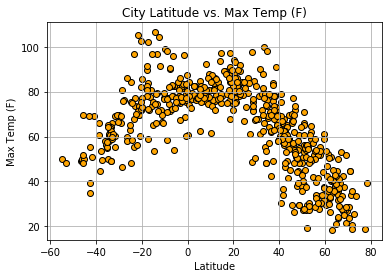

In [22]:
from scipy import stats
import scipy.stats as st

x = cities['Lat']
y = cities['Max Temp']

plt.scatter(x,y, facecolors = 'orange', edgecolor = 'black')
plt.title('City Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(b= True)
plt.savefig("output/figures/lat_temp.png")

#The temperature increases as you get closer to the equator

## Latitude vs. Humidity Plot

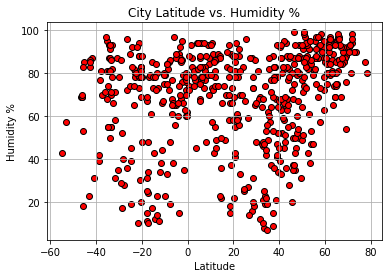

In [23]:
x = cities['Lat']
y = cities['Humidity']

plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.title('City Latitude vs. Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(b= True)
plt.savefig("output/figures/lat_humidity.png")
#Humidity is consistently high around the equator and becomes more distributed as you move either north or south

## Latitude vs. Cloudiness Plot

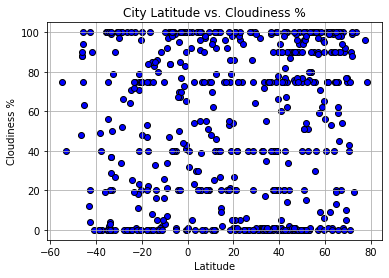

In [24]:
x = cities['Lat']
y = cities['Cloudiness']

plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(b= True)
plt.savefig("output/figures/lat_clouds.png")
#Majority of citys have either 100% cloudiness or very low-to-0 cloudiness

## Latitude vs. Wind Speed Plot

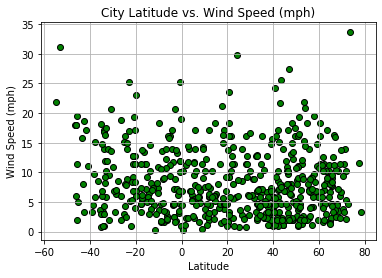

In [25]:
x = cities['Lat']
y = cities['Wind Speed']

plt.scatter(x,y, facecolors = 'green', edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b= True)
plt.savefig("output/figures/lat_wind.png")
#Most observed cities do not have wind speed above 10 mph

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities.loc[cities['Lat']>= 0]
southern = cities.loc[cities['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is -0.8264615900420769


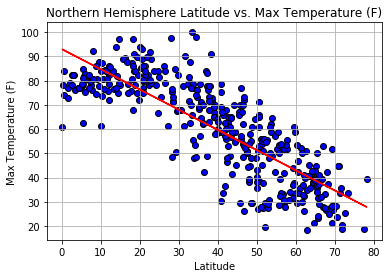

In [26]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_temp.png")
# The high -r value indicates a strong negative correlation between latitude and max temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is 0.6498392363324106


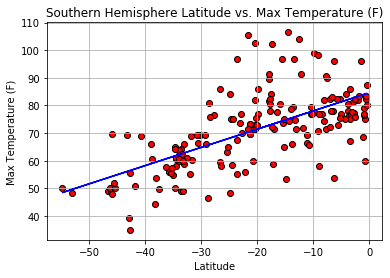

In [27]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_temp.png")
# The high r value indicates a strong positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.23096660464857824


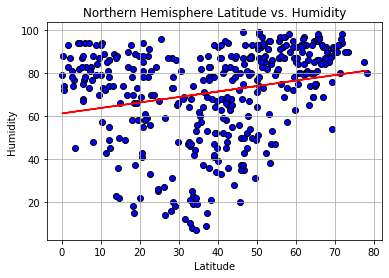

In [28]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_humidity.png")
#The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.007711137561062979


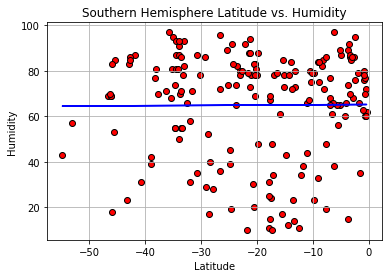

In [29]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.12594504352775468


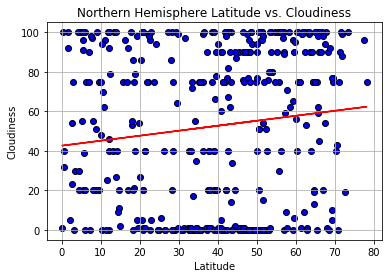

In [30]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_clouds.png")
#The low r values indicate a weak positive relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.12652559660032914


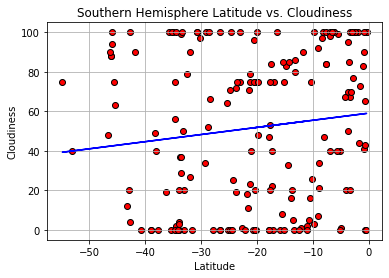

In [31]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_clouds.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is 0.04342818033602777


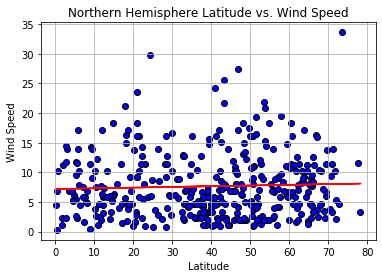

In [32]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_wind.png")
#The low r values indicate that there is no real relationship between wind speed and latitude. The difference 
#between the hemispheres doesn't seem to be significant enough to comment upon.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is -0.19638633967708025


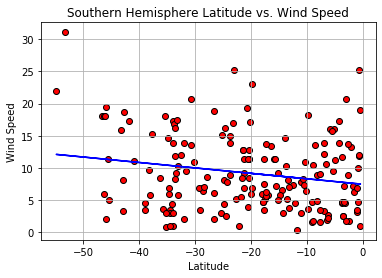

In [33]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
plt.savefig("output/figures/south_lat_wind.png")
print(f' The r-squared is {cor[0]}')

In [34]:
#Load the CSV previously exported into DataFrame
data = "output/city_data.csv"
cities = pd.read_csv(data)
cities.rename(columns = {'Unnamed: 0' : 'Drop'}, inplace = True)
del cities['Drop']
#
cities

City Country          Date    Lat     Lng  Max Temp  Humidity  \
0       lewisville      US  1.601927e+09  33.05  -96.99     79.00      46.0   
1           pinega      RU  1.601927e+09  64.70   43.39     39.88      95.0   
2    san cristobal      VE  1.601927e+09   7.77  -72.22     75.99      77.0   
3           huacho      PE  1.601927e+09 -11.11  -77.61     66.45      66.0   
4        busselton      AU  1.601927e+09 -33.65  115.33     48.99      55.0   
..             ...     ...           ...    ...     ...       ...       ...   
566     port blair      IN  1.601927e+09  11.67   92.75     80.65      85.0   
567        triesen      LI  1.601927e+09  47.10    9.53     52.00      93.0   
568         xuzhou      CN  1.601927e+09  34.18  117.16     53.38      44.0   
569        hagenow      DE  1.601927e+09  53.43   11.18     50.00      95.0   
570     assiniboia      CA  1.601927e+09  49.63 -105.98     64.33      31.0   

     Cloudiness  Wind Speed  
0           0.0        1.99  
1          13.0        1.74  
2          97.0        4.94  
3           2.0        7.72  
4          99.0        8.19  
..          ...         ...  
566        25.0        7.67  
567        90.0        1.99  
568        55.0        4.36  
569       100.0        1.99  
570         0.0       17.49  

[571 rows x 9 columns]

In [35]:
#Create a Humidity map using gmaps that uses Latitude and Longitude as the location 
#and add the Humidity as a Layer Heatmap 
!jupyter nbextension list
!jupyter nbextension enable --py gmaps
from ipywidgets.embed import embed_minimal_html
#
gmaps.configure(api_key = g_key)
locations = cities[['Lat', 'Lng']]
weights = cities['Humidity']
fig = gmaps.figure(map_type = 'HYBRID', center = (0,0), zoom_level = 3)
heat = gmaps.heatmap_layer(locations, weights = weights, max_intensity = 0, point_radius = 30)
fig.add_layer(heat)
#
fig

Known nbextensions:
  config dir: C:\Users\chris\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
  config dir: C:\Users\chris\Anaconda3\etc\jupyter\nbconfig
    notebook section
      bqplot/extension enabled 
      ipyvolume/extension enabled 
      jupyter-webrtc/extension enabled 
      jupyter-datawidgets/extension enabled 
      jupyter-leaflet/extension enabled 
      jupyter-matplotlib/extension enabled 
      jupyter-threejs/extension enabled 
      jupyter-vue/extension enabled 
      jupyter-vuetify/extension enabled 
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


Figure(layout=FigureLayout(height='420px'))

In [36]:
#Create a new DataFrame with idyllic weather conditions that can be used for 
#potential destinations for a vacation

hotels = cities.loc[(cities["Max Temp"] <= 80) & (cities["Max Temp"] >= 70) &(cities["Cloudiness"] == 0) &(cities["Wind Speed"] < 10)]
hotels

City Country          Date    Lat    Lng  Max Temp  \
0             lewisville      US  1.601927e+09  33.05 -96.99     79.00   
63   santiago del estero      AR  1.601927e+09 -27.80 -64.26     76.48   
65            alexandria      EG  1.601927e+09  31.22  29.96     77.88   
155                  hit      IQ  1.601927e+09  33.64  42.83     77.05   
168             akbarpur      IN  1.601927e+09  26.42  82.55     79.18   
224                kifri      IQ  1.601927e+09  34.70  44.97     76.26   
228               kharan      PK  1.601927e+09  28.58  65.42     71.35   
284          thomasville      US  1.601927e+09  35.88 -80.08     71.01   
368                matay      EG  1.601927e+09  28.42  30.78     76.53   
370             kalmunai      LK  1.601927e+09   7.42  81.82     79.81   
409          chake chake      TZ  1.601927e+09  -5.25  39.77     75.42   
528            abu kamal      SY  1.601927e+09  34.45  40.92     74.26   
534            karpathos      GR  1.601927e+09  35.51  27.21     78.80   
565            morondava      MG  1.601927e+09 -20.28  44.28     75.34   

     Humidity  Cloudiness  Wind Speed  
0        46.0         0.0        1.99  
63       28.0         0.0        8.57  
65       68.0         0.0        8.93  
155      19.0         0.0        7.00  
168      59.0         0.0        2.75  
224      19.0         0.0        6.55  
228      20.0         0.0        3.91  
284      57.0         0.0        2.21  
368      31.0         0.0        9.13  
370      81.0         0.0        1.61  
409      89.0         0.0        9.44  
528      22.0         0.0        9.62  
534      60.0         0.0        2.46  
565      78.0         0.0        8.34

In [37]:
#Using Google Maps API, find a hotel within 5000 meters of each location and add the hotel to the dataFrame

hotels['Hotel Name'] = ''
params = {
    "radius": 5000, 
    "types": "lodging",
    "key": g_key}

for index, row in hotels.iterrows():
    city = row['City']
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    response = requests.get(url, params = params)
    response = response.json()
    try:
        print(f'Finding Lodging for {city}')
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = response["results"][0]["name"]
    except (KeyError, IndexError):
        print("No Lodging Found.")
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = "No Lodging Found"
        
hotels
        

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Finding Lodging for lewisville
----------------------------


C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Finding Lodging for santiago del estero
----------------------------
Finding Lodging for alexandria
----------------------------
Finding Lodging for hit
----------------------------
Finding Lodging for akbarpur
----------------------------
Finding Lodging for kifri
----------------------------
Finding Lodging for kharan
----------------------------
Finding Lodging for thomasville
----------------------------
Finding Lodging for matay
----------------------------
Finding Lodging for kalmunai
----------------------------
Finding Lodging for chake chake
----------------------------
Finding Lodging for abu kamal
----------------------------
Finding Lodging for karpathos
----------------------------
Finding Lodging for morondava
----------------------------


City Country          Date    Lat    Lng  Max Temp  \
0             lewisville      US  1.601927e+09  33.05 -96.99     79.00   
63   santiago del estero      AR  1.601927e+09 -27.80 -64.26     76.48   
65            alexandria      EG  1.601927e+09  31.22  29.96     77.88   
155                  hit      IQ  1.601927e+09  33.64  42.83     77.05   
168             akbarpur      IN  1.601927e+09  26.42  82.55     79.18   
224                kifri      IQ  1.601927e+09  34.70  44.97     76.26   
228               kharan      PK  1.601927e+09  28.58  65.42     71.35   
284          thomasville      US  1.601927e+09  35.88 -80.08     71.01   
368                matay      EG  1.601927e+09  28.42  30.78     76.53   
370             kalmunai      LK  1.601927e+09   7.42  81.82     79.81   
409          chake chake      TZ  1.601927e+09  -5.25  39.77     75.42   
528            abu kamal      SY  1.601927e+09  34.45  40.92     74.26   
534            karpathos      GR  1.601927e+09  35.51  27.21     78.80   
565            morondava      MG  1.601927e+09 -20.28  44.28     75.34   

     Humidity  Cloudiness  Wind Speed                            Hotel Name  
0        46.0         0.0        1.99  Best Western Dallas-Lewisville Hotel  
63       28.0         0.0        8.57                          Hotel Urbano  
65       68.0         0.0        8.93                     Royal Crown Hotel  
155      19.0         0.0        7.00                       Aboody Alhachem  
168      59.0         0.0        2.75                   Hotel Aviral Palace  
224      19.0         0.0        6.55                            میزان کفری  
228      20.0         0.0        3.91                    Ghani Hasrat House  
284      57.0         0.0        2.21          Comfort Inn Thomasville I-85  
368      31.0         0.0        9.13                            Nag Aespen  
370      81.0         0.0        1.61                              VS Villa  
409      89.0         0.0        9.44                     Hotel Archipelago  
528      22.0         0.0        9.62                          محطة التلفاز  
534      60.0         0.0        2.46                                  Alex  
565      78.0         0.0        8.34                        La Case Bambou

In [38]:
# Add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in hotels.iterrows()]
lodging = hotels[["Lat", "Lng"]]


In [39]:
# Add marker layer ontop of heat map
# Display figure
hotel_plot = gmaps.symbol_layer(lodging, fill_color = 'red', stroke_color = 'blue', info_box_content = hotel_info)
fig.add_layer(hotel_plot)
#
fig

Figure(layout=FigureLayout(height='420px'))